<a href="https://colab.research.google.com/github/nadiya-k-a/Tcs---internship/blob/main/Copy_of_Latest_rio_internship_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data2.csv')

In [ ]:
data.isna().sum()

uniqueID           0
Name               0
Gender             0
Age                0
Race               0
drugName           0
condition       2298
rating             0
date               0
usefulCount        0
Side effects       0
dtype: int64

In [ ]:
# Descriptive status of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,399819.0,116037.183553,66968.215158,0.0,58167.0,115909.0,173852.5,232291.0
Age,399819.0,48.972563,18.181783,18.0,33.0,49.0,65.0,80.0
rating,399819.0,6.073458,3.135697,1.0,3.0,7.0,9.0,10.0
usefulCount,399819.0,26.602805,28.373669,0.0,8.0,21.0,37.0,1291.0


In [ ]:
# Descriptive status of categorical columns
data.describe(include = 'object').T

,count,unique,top,freq
Name,399819,192698,Michael Smith,210
Gender,399819,2,Female,279932
Race,399819,5,Asian,112149
drugName,399819,3671,Levonorgestrel,9187
condition,397521,916,Birth Control,71639
date,399819,3579,27-Jan-16,368
Side effects,399819,5,Severe Side Effects,111882


In [ ]:
# Checking for misssing values
data.isna().sum()

uniqueID           0
Name               0
Gender             0
Age                0
Race               0
drugName           0
condition       2298
rating             0
date               0
usefulCount        0
Side effects       0
dtype: int64

In [ ]:
##filetring out the null value columns
data[data['condition'].isnull()]

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
34,77164,Rita Stephens,Female,20,African,Lorcaserin,NaN,5,27-May-14,21,Severe Side Effects
146,192374,Gary Hutchinson,Female,19,Hispanic,Drospirenone / ethinyl estradiol,NaN,4,13-Apr-15,8,Mild Side Effects
156,165767,Vickie Li,Female,77,Hispanic,Levonorgestrel,NaN,7,3-Apr-17,0,Mild Side Effects
779,157589,Joshua Lawrence,Female,50,Mixed,Guaifenesin,NaN,9,23-Feb-10,10,No Side Effects
1017,96918,David Barnes,Female,65,White,Conjugated estrogens / medroxyprogesterone,NaN,1,6-Jul-15,5,Severe Side Effects
...,...,...,...,...,...,...,...,...,...,...,...
399197,195259,Drew Gomez DDS,Male,71,Hispanic,Dutasteride / tamsulosin,NaN,6,1-Mar-13,18,Mild Side Effects
399304,104876,Kevin Lewis,Female,56,Mixed,Ethinyl estradiol / levonorgestrel,NaN,3,27-Jan-10,43,No Side Effects
399328,200096,Dennis Swanson,Female,35,Hispanic,Varenicline,NaN,9,31-Aug-15,8,Mild Side Effects
399594,206487,Jacob Adams,Female,38,Asian,Mesalamine,NaN,4,8-Oct-08,34,Moderate Side Effects


# **Univariate Analysis**

In [ ]:
data1 = data.copy()

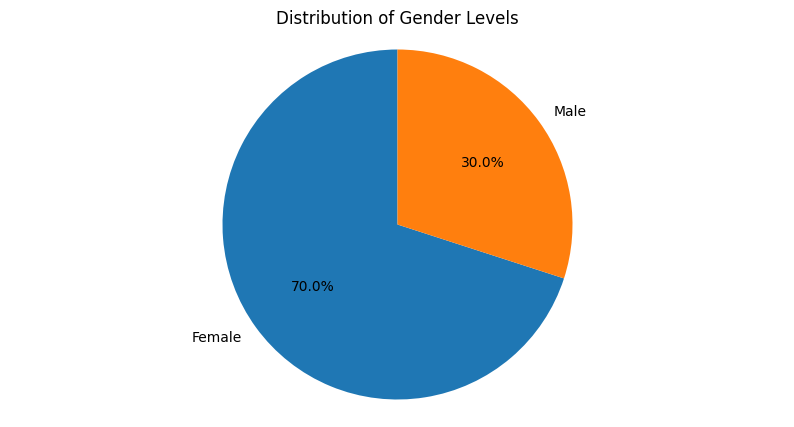

In [ ]:
# Univariate analysis of gender
gen_count=data['Gender'].value_counts()
gen_count

fig,ax=plt.subplots(figsize=(10,5))
ax.pie(gen_count,labels=gen_count.index,autopct='%1.1f%%',startangle=90)
ax.set_title("Distribution of Gender Levels")
ax.axis("equal")
plt.show()

Here no of females is same as no of males

In [ ]:
data['drugName'].value_counts()


Levonorgestrel                       9187
Etonogestrel                         8192
Ethinyl estradiol / norethindrone    6915
Nexplanon                            5374
Ethinyl estradiol / norgestimate     5150
                                     ... 
Polocaine                               1
Cubicin                                 1
Demadex                                 1
Imiglucerase                            1
Grifulvin V                             1
Name: drugName, Length: 3671, dtype: int64

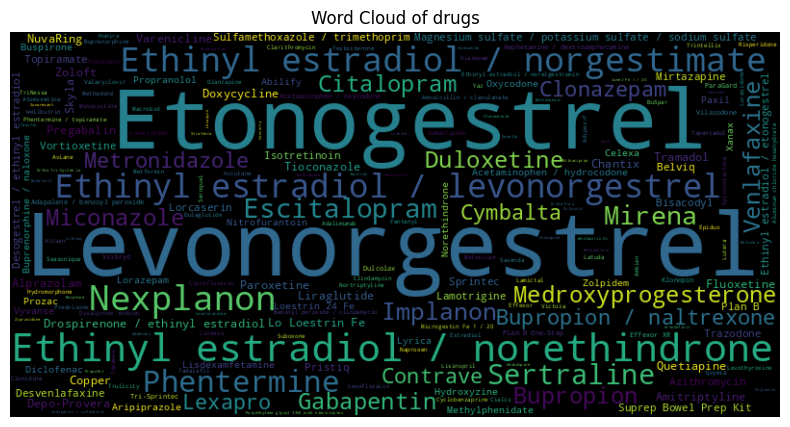

In [ ]:
# Univariate analysis of drugname using Word Cloud


from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(data['drugName'].value_counts())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of drugs')
plt.show()

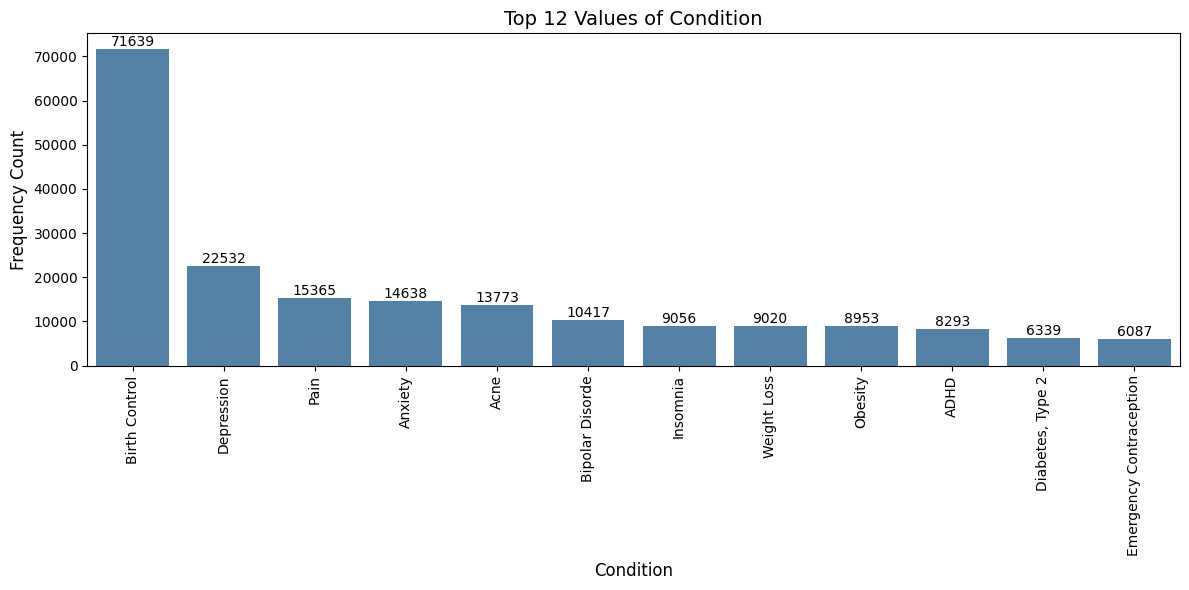

In [ ]:
# top 12 values of condition plot

condition_counts = data['condition'].value_counts()
top_12_values = condition_counts.nlargest(12)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_12_values.index, y=top_12_values.values, color='steelblue')
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Frequency Count', fontsize=12)
plt.title('Top 12 Values of Condition', fontsize=14)

# Display total count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=10)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(-1.099999075418466,
 1.0999993601361826,
 -1.0999995234375641,
 1.0999999773065507)

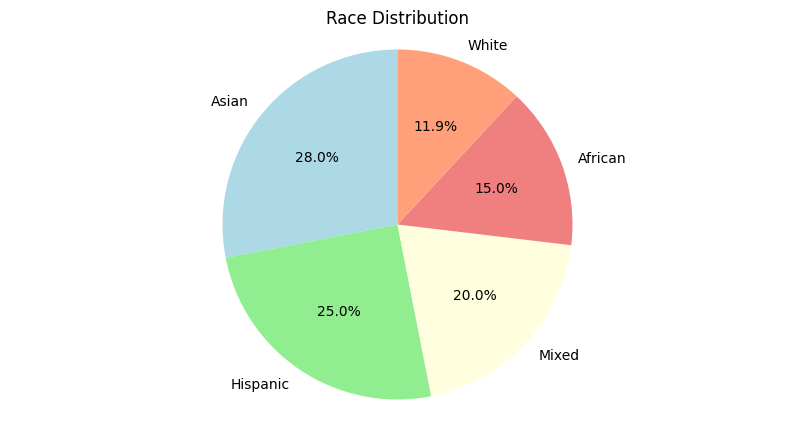

In [ ]:
# Univariate analysis of Race

# Calculate the frequency count for each race level
race_counts = data['Race'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 5))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightsalmon'])
plt.title('Race Distribution')
plt.axis('equal')

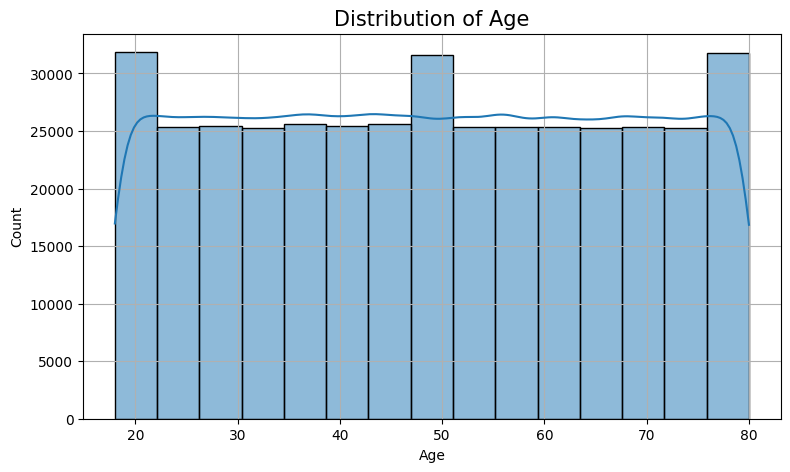

In [ ]:
#Univariate analysis of Age
plt.figure(figsize=(9, 5))
sns.histplot(data['Age'],bins = 15, kde=True)
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Age')
plt.grid()
plt.show()

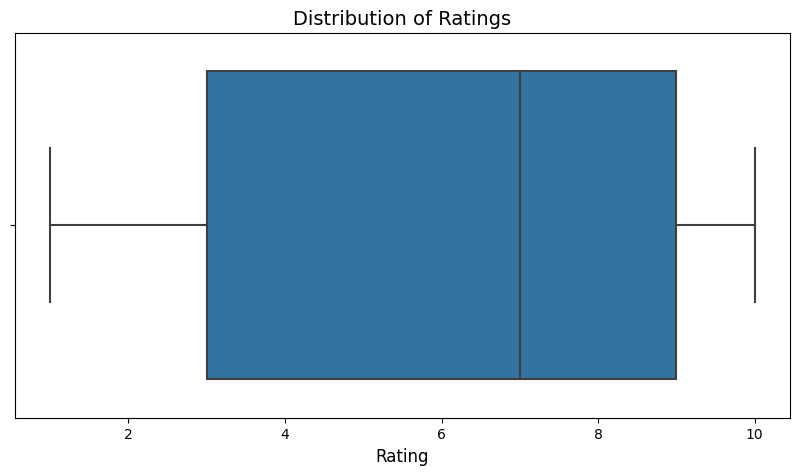

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="rating")
plt.xlabel("Rating", fontsize=12)
plt.title("Distribution of Ratings", fontsize=14)
plt.show()

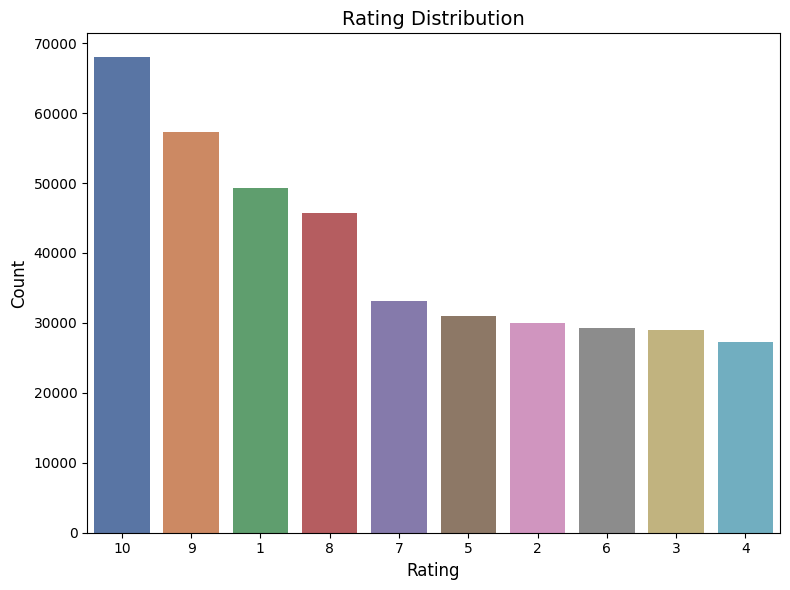

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='rating', palette='deep',order=data['rating'].value_counts().index)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Rating Distribution', fontsize=14)
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

The aim is to compare the age with the Side effects column to identify if any relationships exist. For the purpose the age column is divided into 4bins (categories) :-

Young - Less than 25 years

Middle - 25 to 40 years

Senior - 40 to 50 years

Elder - 50 years or older

In [ ]:
data1['Age'] = pd.cut(data1['Age'],bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])


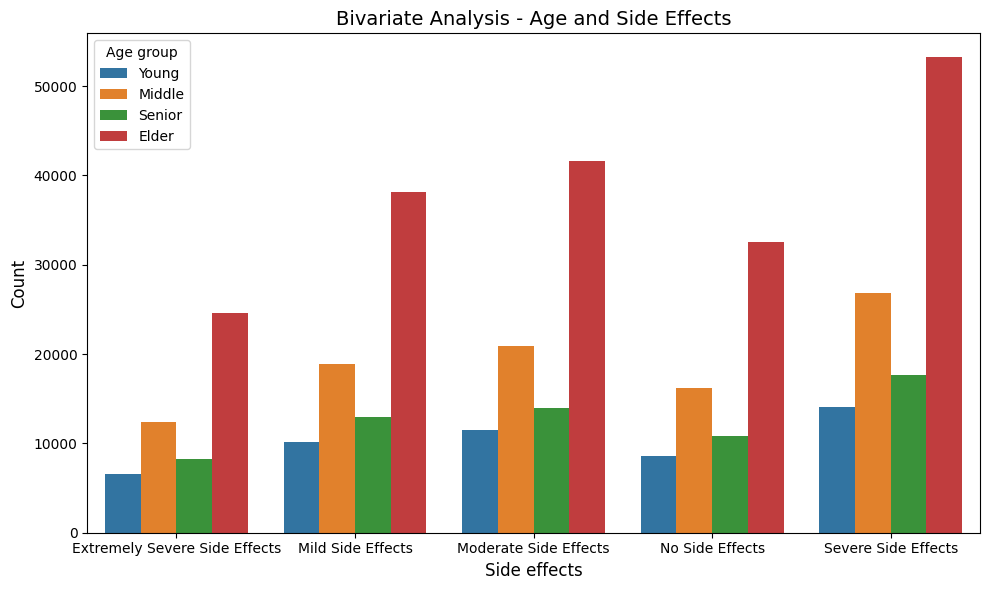

In [ ]:
# Grouping by 'Age' and 'Side Effects' and calculating the count
bivariate_data = data1.groupby(['Side effects','Age']).size().reset_index(name='Count')

# Plotting the bivariate analysis
plt.figure(figsize=(10, 6))
sns.barplot(data=bivariate_data, x='Side effects', y='Count', hue='Age')
plt.xlabel('Side effects', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bivariate Analysis - Age and Side Effects', fontsize=14)
plt.legend(title='Age group')
plt.tight_layout()
plt.show()

Side effects are more seen in elder community compared to other age groups


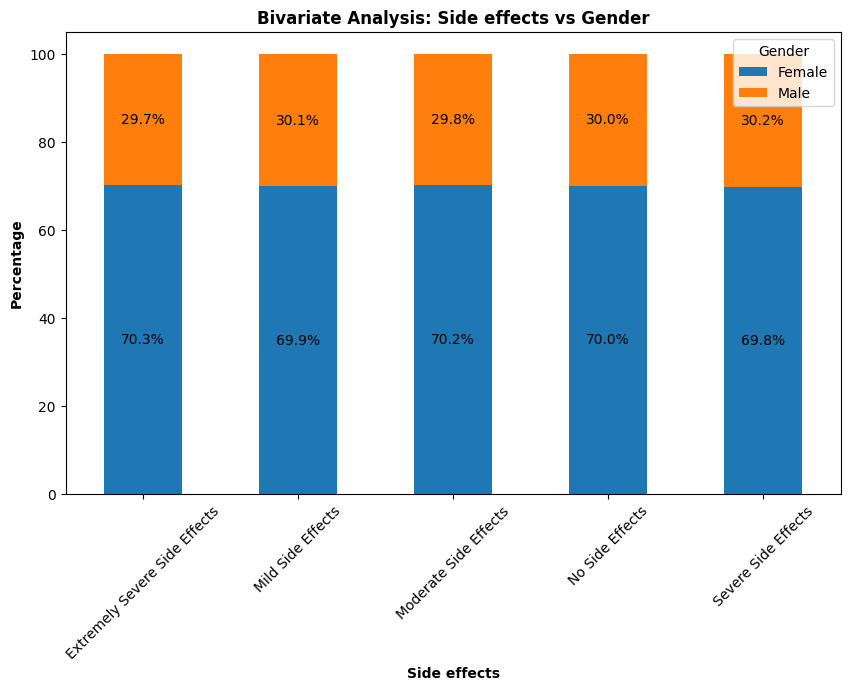

In [ ]:
# Crosstabulation for bivariate analysis
bivariate_table = pd.crosstab(index=data['Side effects'], columns=data['Gender'], normalize='index') * 100

# Plotting a stacked bar chart to show the percentage
ax = bivariate_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Bivariate Analysis: Side effects vs Gender', fontweight='bold')
plt.xlabel('Side effects', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Adding percentage labels inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

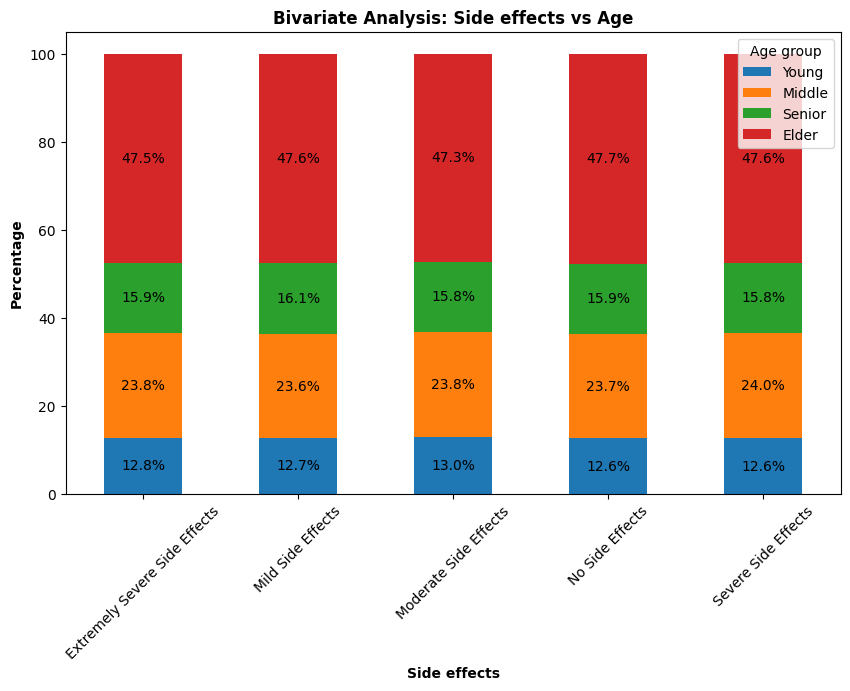

In [ ]:
# Crosstabulation for bivariate analysis
bivariate_table = pd.crosstab(index=data1['Side effects'], columns=data1['Age'], normalize='index') * 100

# Plotting a stacked bar chart to show the percentage
ax = bivariate_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Bivariate Analysis: Side effects vs Age', fontweight='bold')
plt.xlabel('Side effects', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Age group')

# Adding percentage labels inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

In [ ]:
## function for bivariate analysis
def bivariate_analysis(data, column):
    bivariate_table = pd.crosstab(index=data['Side effects'], columns=data[column], normalize='index') * 100

    ax = bivariate_table.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f"Bivariate Analysis: Side effects vs {column}", fontweight="bold")
    plt.xlabel(f'{column}', fontweight="bold")
    plt.ylabel("Percentage", fontweight="bold")
    plt.xticks(rotation=45)
    plt.legend(title=f'{column}')

    # Adding percentage labels inside the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f"{height:.1f}%", (x + width / 2, y + height / 2), ha='center', va='center')


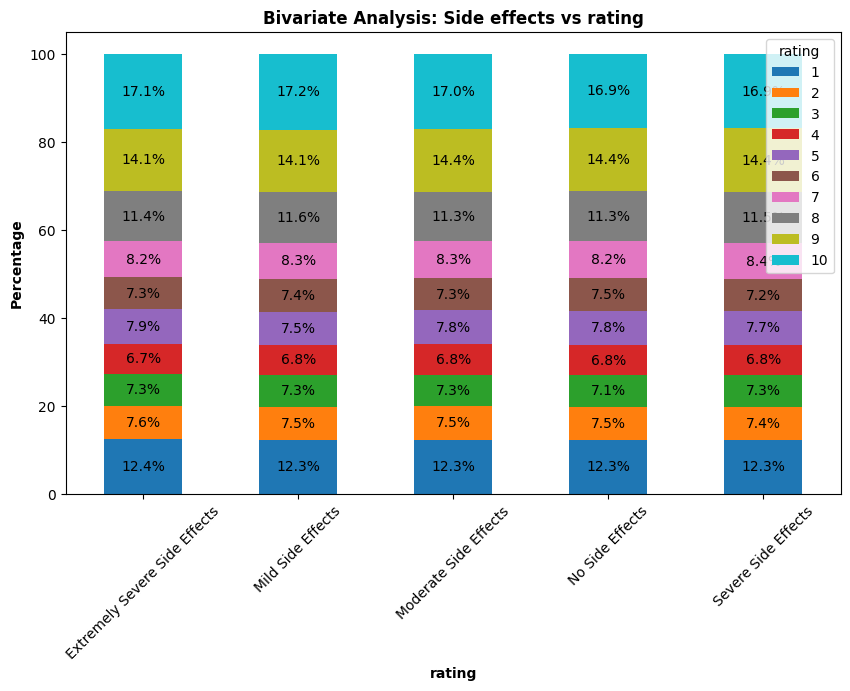

In [ ]:
bivariate_analysis(data,'rating')

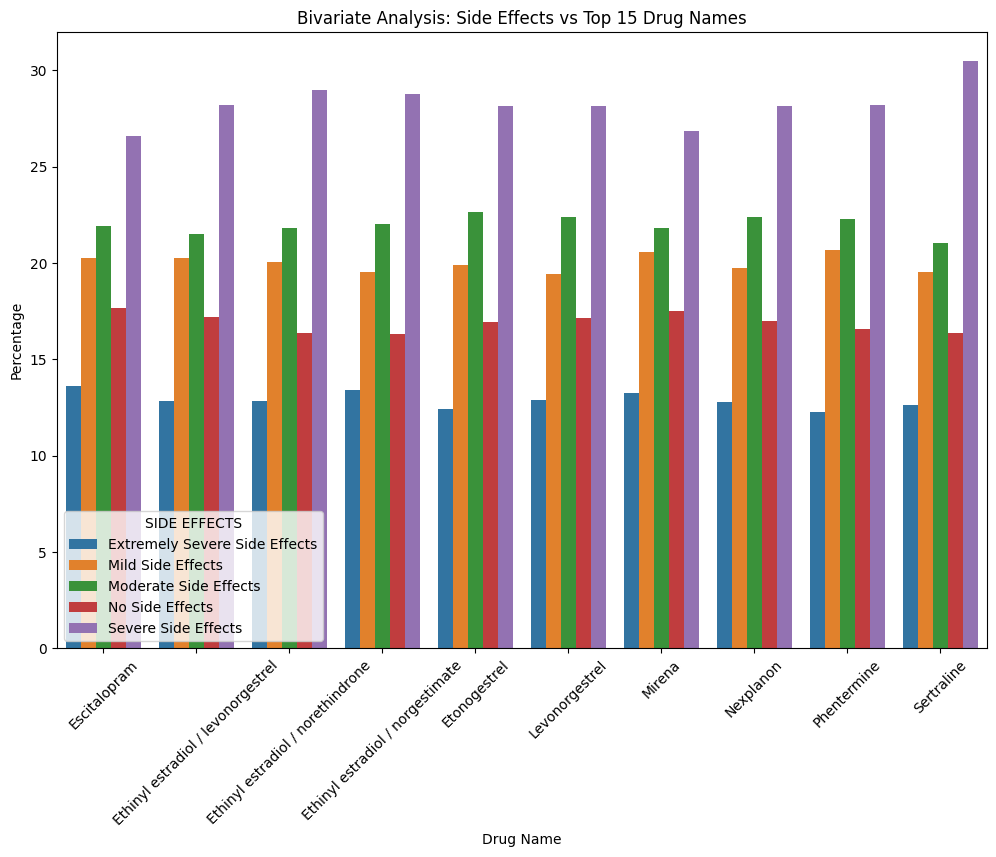

In [ ]:
# Step 1: Get top drug names
top_drug_names = data['drugName'].value_counts().nlargest(10).index

# Step 2: Filter the dataframe based on top drug names
filtered_data = data[data['drugName'].isin(top_drug_names)]

# Step 3: Cross-tabulation of side effects and filtered drug names
cross_tab = pd.crosstab(filtered_data['drugName'], filtered_data['Side effects'])

# Normalize the cross-tabulation table along the columns
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Reset index for Seaborn compatibility
cross_tab_normalized = cross_tab_normalized.reset_index()

# Melt the DataFrame for easier plotting
melted_data = pd.melt(cross_tab_normalized, id_vars='drugName', var_name='Side Effect', value_name='Percentage')

# Plot the grouped bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='drugName', y='Percentage', hue='Side Effect', data=melted_data)
plt.xlabel('Drug Name')
plt.ylabel('Percentage')
plt.title('Bivariate Analysis: Side Effects vs Top 15 Drug Names')
plt.xticks(rotation=45)
plt.legend(title='SIDE EFFECTS', loc='lower left')
# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()



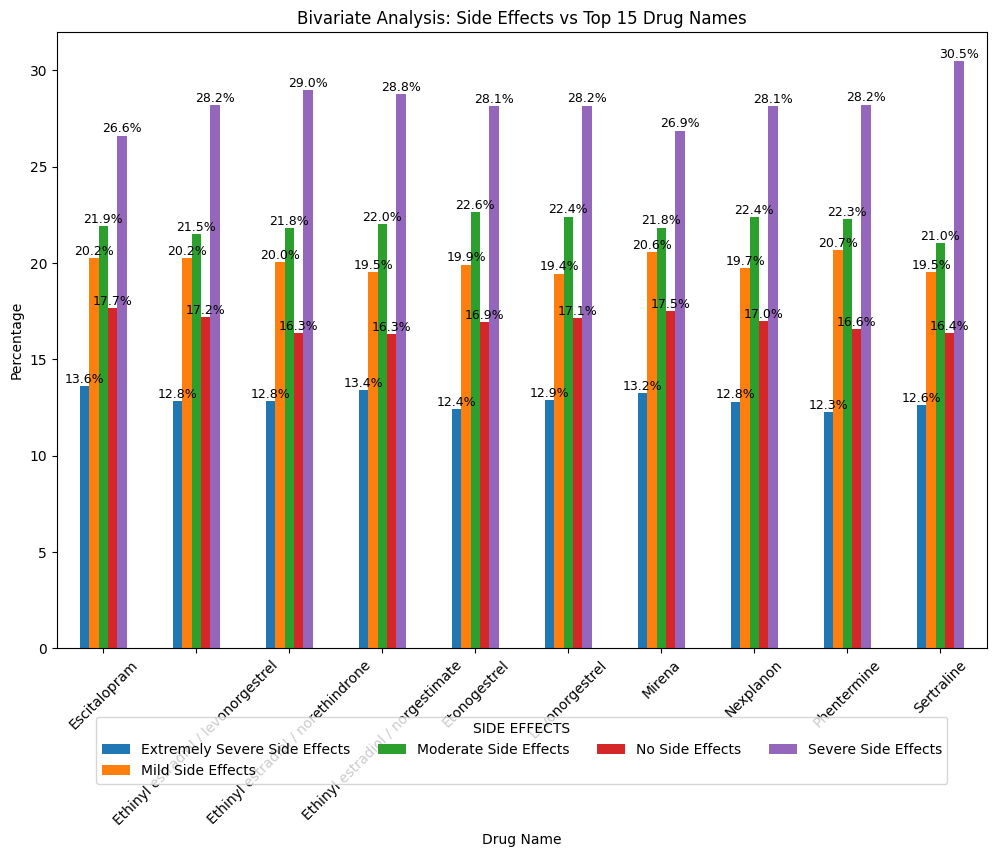

In [ ]:
# Step 1: Get top drug names
top_drug_names = data['drugName'].value_counts().nlargest(10).index

# Step 2: Filter the dataframe based on top drug names
filtered_data = data[data['drugName'].isin(top_drug_names)]

# Step 3: Cross-tabulation of side effects and filtered drug names
cross_tab = pd.crosstab(filtered_data['drugName'], filtered_data['Side effects'])

# Normalize the cross-tabulation table along the columns
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot the grouped bar chart with percentage labels
ax = cross_tab_normalized.plot(kind='bar', figsize=(12, 8))
ax.set_xlabel('Drug Name')
ax.set_ylabel('Percentage')
ax.set_title('Bivariate Analysis: Side Effects vs Top 15 Drug Names')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Change the legend position
plt.legend(title='SIDE EFFECTS', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.xticks(rotation=45)
plt.show()

<ipython-input-27-bc7dd6abb232>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix=data.corr()
<ipython-input-27-bc7dd6abb232>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)


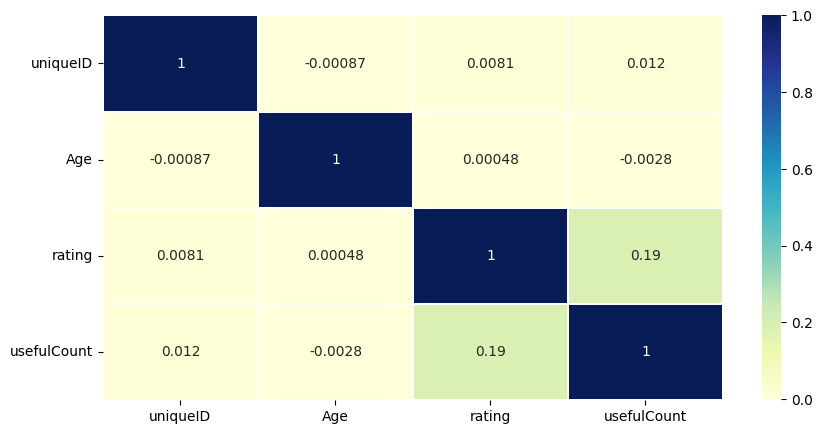

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
!pip install Buffer

  Preparing metadata (setup.py) ... done
  Created wheel for wrapt: filename=wrapt-1.11.2-cp310-cp310-linux_x86_64.whl size=71165 sha256=1520a7c054bd0a0b5cadcdbc78353422adb8992eb6561c3c15d1b13fb7f2fbf3
  Stored in directory: /root/.cache/pip/wheels/52/c4/b2/401bb0f4c0e950a9066cbc424cc87c6e771a781bcb05a1683b
Successfully built wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.1
    Uninstalling wrapt-1.14.1:
      Successfully uninstalled wrapt-1.14.1



# **Pre Processing**

## Null Value Handling

In [ ]:
# identifying null values
data.isna().mean()*100

uniqueID        0.00000
Name            0.00000
Gender          0.00000
Age             0.00000
Race            0.00000
drugName        0.00000
condition       0.57476
rating          0.00000
date            0.00000
usefulCount     0.00000
Side effects    0.00000
dtype: float64

In [ ]:
## creating Dataframe for null values analysis
rating_null = data[data['condition'].isna()]
rating_null

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
34,77164,Rita Stephens,Female,20,African,Lorcaserin,NaN,5,27-May-14,21,Severe Side Effects
146,192374,Gary Hutchinson,Female,19,Hispanic,Drospirenone / ethinyl estradiol,NaN,4,13-Apr-15,8,Mild Side Effects
156,165767,Vickie Li,Female,77,Hispanic,Levonorgestrel,NaN,7,3-Apr-17,0,Mild Side Effects
779,157589,Joshua Lawrence,Female,50,Mixed,Guaifenesin,NaN,9,23-Feb-10,10,No Side Effects
1017,96918,David Barnes,Female,65,White,Conjugated estrogens / medroxyprogesterone,NaN,1,6-Jul-15,5,Severe Side Effects
...,...,...,...,...,...,...,...,...,...,...,...
399197,195259,Drew Gomez DDS,Male,71,Hispanic,Dutasteride / tamsulosin,NaN,6,1-Mar-13,18,Mild Side Effects
399304,104876,Kevin Lewis,Female,56,Mixed,Ethinyl estradiol / levonorgestrel,NaN,3,27-Jan-10,43,No Side Effects
399328,200096,Dennis Swanson,Female,35,Hispanic,Varenicline,NaN,9,31-Aug-15,8,Mild Side Effects
399594,206487,Jacob Adams,Female,38,Asian,Mesalamine,NaN,4,8-Oct-08,34,Moderate Side Effects


### *Filling null values in column 'condition' with respect to the column 'drugName'*

In [ ]:
data['condition'] = data.groupby('drugName')['condition'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

In [ ]:
# identifying null values
data.isna().mean()*100

uniqueID        0.0
Name            0.0
Gender          0.0
Age             0.0
Race            0.0
drugName        0.0
condition       0.0
rating          0.0
date            0.0
usefulCount     0.0
Side effects    0.0
dtype: float64

# **Outlier Detection**

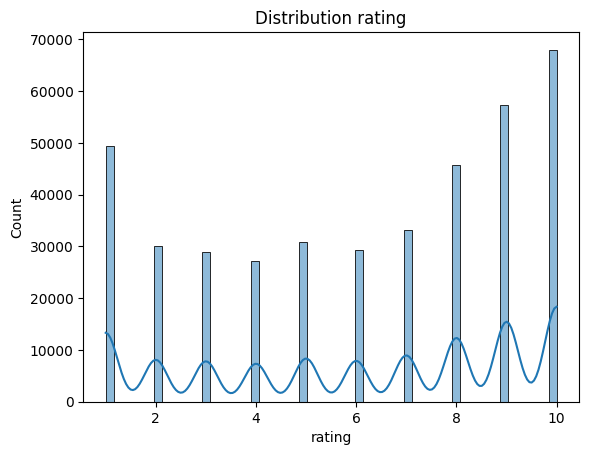

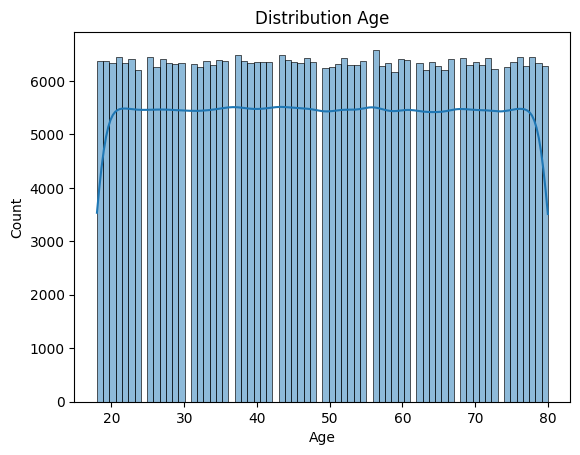

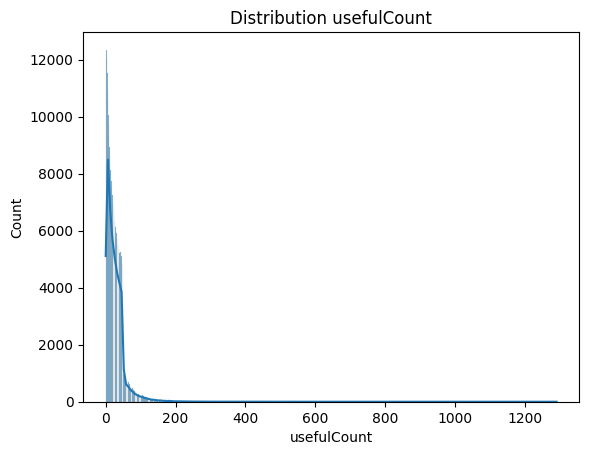

In [ ]:
# checking distribution of columns
columns =['rating',  'Age', 'usefulCount']
for feature in columns:

    data2 = data.copy()
    sns.histplot(data2[feature],kde=True)

    plt.xlabel(feature)
    plt.title('Distribution ' + feature)
    plt.show()

In [ ]:
# checking skewness of column
print('Age Skewness: ',data['Age'].skew())
print('rating Skewness: ',data['rating'].skew())
print('usefulcount ',data['usefulCount'].skew())

Age Skewness:  0.0023779599892745935
rating Skewness:  -0.2992945327460599
usefulcount  5.19324047695971


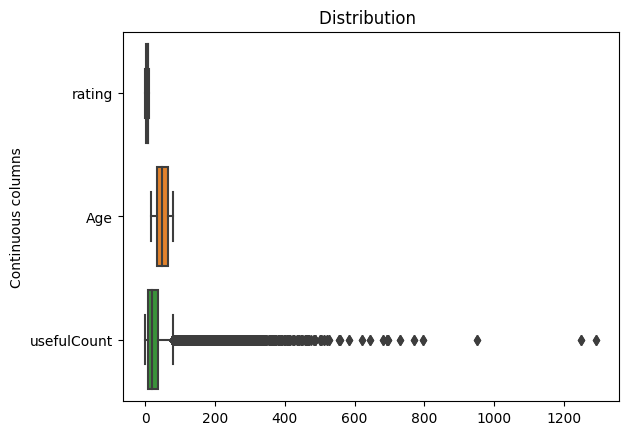

In [ ]:
## Box Plot to Identify Outlier columns
sns.boxplot(data[['rating',  'Age', 'usefulCount']],orient='h')

plt.ylabel('Continuous columns')
plt.title('Distribution ')
plt.show()

Usefulcount column has outlier values

In [ ]:
## describtive statiscs to find mean,std,min,max,25 percentile,50 percentile,75percentile
data[['usefulCount']].describe()

,usefulCount
count,399819.000000
mean,26.602805
std,28.373669
min,0.000000
25%,8.000000
50%,21.000000
75%,37.000000
max,1291.000000


In [ ]:
### 25 percentile
percentile25 = data['usefulCount'].quantile(0.25)

### 75 percentile
percentile75 = data['usefulCount'].quantile(0.75)

### Finding IQR
IQR_usefulcount = percentile75-percentile25


In [ ]:
## Upper and lower limit of usefulcount
upper = percentile75+1.5*IQR_usefulcount
lower = percentile25-1.5*IQR_usefulcount

In [ ]:
## copying outliers from  datafram to new dataframe
usefulcount_out = data[(data['usefulCount']<lower)|(data['usefulCount']>upper)]

In [ ]:
print('percent ofoutlier in data : ',len(usefulcount_out)/len(data)*100)

percent ofoutlier in data :  3.8004697125449267


In [ ]:
usefulcount_out.shape

(15195, 11)

In [ ]:
usefulcount_out['usefulCount'] = np.log(usefulcount_out['usefulCount'])

<ipython-input-42-6dce9d954a97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usefulcount_out['usefulCount'] = np.log(usefulcount_out['usefulCount'])


In [ ]:
a=list(data.drugName.unique())

In [ ]:
c=pd.DataFrame(a,columns=['Medicine Name']).astype(str)
k=c[c['Medicine Name'].str.contains('/')==False]
#k=c
t=[]
for n in k['Medicine Name']:
    n=n+' '
    l=list(k.loc[k['Medicine Name'].str.contains(n),'Medicine Name'])
    c=list(k.loc[k['Medicine Name'].str.contains(n)].index)
    k=k.drop(index=c)
    n=n[:-1]
    l.insert(0,n)
    o=len(l)
    if (o>=2):
        t.append(l)

# create a list of elements form the drugname which are similar and identical
#in name and function but due to slight variation in name it is identified as new drug

# exmample
#['Afrin','Afrin 4 Hour Extra Moisturizing','Afrin NoDrip Sinus','Afrin Original]
#['Calan', 'Calan SR']

<ipython-input-44-0d7c438a54c5>:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  l=list(k.loc[k['Medicine Name'].str.contains(n),'Medicine Name'])
<ipython-input-44-0d7c438a54c5>:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  c=list(k.loc[k['Medicine Name'].str.contains(n)].index)
<ipython-input-44-0d7c438a54c5>:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  l=list(k.loc[k['Medicine Name'].str.contains(n),'Medicine Name'])
<ipython-input-44-0d7c438a54c5>:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  c=list(k.loc[k['Medicine Name'].str.contains(n)].index)
<ipython-input-44-0d7c438a54c5>:7: UserWarning: This pattern is interpreted 

In [ ]:
t

[['Bactrim', 'Bactrim DS'],
 ['Methadone', 'Methadone Diskets'],
 ['Belviq', 'Belviq XR'],
 ['Seroquel', 'Seroquel XR'],
 ['Ambien', 'Ambien CR'],
 ['Klonopin', 'Klonopin Wafer'],
 ['Gabapentin', 'Gabapentin enacarbil'],
 ['Wellbutrin', 'Wellbutrin XL', 'Wellbutrin SR'],
 ['Ultram', 'Ultram ER', 'Ultram ODT'],
 ['Inderal', 'Inderal LA'],
 ['Promethazine', 'Promethazine DM'],
 ['Depakote', 'Depakote ER', 'Depakote Sprinkles'],
 ['Prozac', 'Prozac Weekly'],
 ['Depo-Provera', 'Depo-Provera Contraceptive'],
 ['Desyrel', 'Desyrel Dividose'],
 ['Metoprolol', 'Metoprolol Tartrate'],
 ['Diazepam', 'Diazepam Intensol'],
 ['Estradiol', 'Estradiol Patch'],
 ['Augmentin', 'Augmentin XR', 'Augmentin ES-600'],
 ['Zofran', 'Zofran ODT'],
 ['Paxil', 'Paxil CR'],
 ['Xanax', 'Xanax XR'],
 ['Nexium', 'Nexium IV', 'Nexium 24HR'],
 ['Azithromycin', 'Azithromycin Dose Pack'],
 ['Sinemet', 'Sinemet CR'],
 ['Fentanyl', 'Fentanyl Transdermal System'],
 ['Abilify', 'Abilify Discmelt', 'Abilify Maintena'],
 ['Re

In [ ]:
for i in t:
    data.loc[data['drugName'].isin(i),'drugName']=i[0]

# replacing the name of the drugs with slight varition to indentical name in the present in the list
# example replacing 'Zyrtec-D 12 Hour' with Zyrtec-D
# example replacing 'Tylenol 8 Hour','Tylenol Allergy Multi-Symptom Nighttime','Tylenol Arthritis Pain' with Tylenol

In [ ]:
data['drugName'].nunique()

3389

# **Encoding**

In [ ]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
data

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
0,163740,Glenn Smith,Male,80,Hispanic,Mirtazapine,Depression,10,28-Feb-12,22,Mild Side Effects
1,206473,Gregory Lopez,Male,63,African,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17,Severe Side Effects
2,159672,Alicia Weiss,Female,80,Asian,Bactrim,Urinary Tract Infection,9,29-Sep-17,3,Severe Side Effects
3,39293,Aaron Smith,Male,20,Hispanic,Contrave,Weight Loss,9,5-Mar-17,35,Extremely Severe Side Effects
4,97768,Jenna Morrison,Female,46,Hispanic,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4,Mild Side Effects
...,...,...,...,...,...,...,...,...,...,...,...
399814,139970,Danielle Ferrell,Female,50,Mixed,Euflexxa,Osteoarthritis,1,14-Jul-10,12,Mild Side Effects
399815,151195,Patrick Gonzalez,Female,32,Hispanic,OxyContin,Pain,7,7-Jan-10,16,Extremely Severe Side Effects
399816,26115,Katherine Roberson,Male,60,African,Sprintec,Birth Control,4,17-Jan-17,42,Severe Side Effects
399817,170693,Stephanie Hancock,Female,72,White,Quetiapine,Depression,8,20-Nov-13,39,Extremely Severe Side Effects


In [ ]:
data['Side effects'].unique()

array(['Mild Side Effects', 'Severe Side Effects',
       'Extremely Severe Side Effects', 'No Side Effects',
       'Moderate Side Effects'], dtype=object)

In [ ]:
data.head()

,uniqueID,Name,Gender,Age,Race,drugName,condition,rating,date,usefulCount,Side effects
0,163740,Glenn Smith,Male,80,Hispanic,Mirtazapine,Depression,10,28-Feb-12,22,Mild Side Effects
1,206473,Gregory Lopez,Male,63,African,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17,Severe Side Effects
2,159672,Alicia Weiss,Female,80,Asian,Bactrim,Urinary Tract Infection,9,29-Sep-17,3,Severe Side Effects
3,39293,Aaron Smith,Male,20,Hispanic,Contrave,Weight Loss,9,5-Mar-17,35,Extremely Severe Side Effects
4,97768,Jenna Morrison,Female,46,Hispanic,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4,Mild Side Effects


In [ ]:
##onehotencoding on Race column
from numpy import int32
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,dtype=int32,drop = 'first')

onehot_encoded = ohe.fit_transform(data[['Race','Gender']])

In [ ]:
# create a new dataframe with encoded valuea

enc_data = pd.DataFrame(onehot_encoded,columns = ohe.get_feature_names_out(['Race','Gender']))

data = pd.concat([data, enc_data], axis=1)

data.drop(['Race','Gender'],axis=1,inplace=True)


In [ ]:
data.head()

,uniqueID,Name,Age,drugName,condition,rating,date,usefulCount,Side effects,Race_Asian,Race_Hispanic,Race_Mixed,Race_White,Gender_Male
0,163740,Glenn Smith,80,Mirtazapine,Depression,10,28-Feb-12,22,Mild Side Effects,0,1,0,0,1
1,206473,Gregory Lopez,63,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17,Severe Side Effects,0,0,0,0,1
2,159672,Alicia Weiss,80,Bactrim,Urinary Tract Infection,9,29-Sep-17,3,Severe Side Effects,1,0,0,0,0
3,39293,Aaron Smith,20,Contrave,Weight Loss,9,5-Mar-17,35,Extremely Severe Side Effects,0,1,0,0,1
4,97768,Jenna Morrison,46,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4,Mild Side Effects,0,1,0,0,0


In [ ]:
data.describe(include = object)

,Name,drugName,condition,date,Side effects
count,399819,399819,399819,399819,399819
unique,192698,3389,917,3579,5
top,Michael Smith,Levonorgestrel,Birth Control,27-Jan-16,Severe Side Effects
freq,210,9187,72678,368,111882


In [ ]:
data['Side effects'].unique()

array(['Mild Side Effects', 'Severe Side Effects',
       'Extremely Severe Side Effects', 'No Side Effects',
       'Moderate Side Effects'], dtype=object)

In [ ]:
side_effect_mapping = {'No Side Effects': 0,
    'Mild Side Effects': 1,
    'Moderate Side Effects': 2,'Severe Side Effects': 3,
    'Extremely Severe Side Effects': 4
                      }

data['Side effects'] = data['Side effects'].map(side_effect_mapping)

In [ ]:
import category_encoders as ce

columns_to_encode = ['drugName','condition']

encoder = ce.TargetEncoder()

data_encoded = encoder.fit_transform(data[columns_to_encode], data['Side effects'])

In [ ]:
data = data.drop(['drugName','condition'],axis =1)

In [ ]:
data_encoded

,drugName,condition
0,1.956012,1.995100
1,2.004587,2.118609
2,1.997658,1.971095
3,1.958621,1.986282
4,2.173926,1.998775
...,...,...
399814,2.025641,1.991045
399815,2.049080,1.985422
399816,1.984802,1.998775
399817,1.997976,1.995100


In [ ]:
data.head()

,uniqueID,Name,Age,rating,date,usefulCount,Side effects,Race_Asian,Race_Hispanic,Race_Mixed,Race_White,Gender_Male
0,163740,Glenn Smith,80,10,28-Feb-12,22,1,0,1,0,0,1
1,206473,Gregory Lopez,63,8,17-May-09,17,3,0,0,0,0,1
2,159672,Alicia Weiss,80,9,29-Sep-17,3,3,1,0,0,0,0
3,39293,Aaron Smith,20,9,5-Mar-17,35,4,0,1,0,0,1
4,97768,Jenna Morrison,46,9,22-Oct-15,4,1,0,1,0,0,0


In [ ]:
data_new = pd.concat([data,data_encoded],axis =1)

In [ ]:
data_new.head()

,uniqueID,Name,Age,rating,date,usefulCount,Side effects,Race_Asian,Race_Hispanic,Race_Mixed,Race_White,Gender_Male,drugName,condition
0,163740,Glenn Smith,80,10,28-Feb-12,22,1,0,1,0,0,1,1.956012,1.995100
1,206473,Gregory Lopez,63,8,17-May-09,17,3,0,0,0,0,1,2.004587,2.118609
2,159672,Alicia Weiss,80,9,29-Sep-17,3,3,1,0,0,0,0,1.997658,1.971095
3,39293,Aaron Smith,20,9,5-Mar-17,35,4,0,1,0,0,1,1.958621,1.986282
4,97768,Jenna Morrison,46,9,22-Oct-15,4,1,0,1,0,0,0,2.173926,1.998775


# **FEATURE REDUCTION**

In [ ]:
data  = pd.DataFrame(data)

In [ ]:
  data_new.drop(['uniqueID','Name','date'],axis = 1,inplace=True)

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Assuming 'editor_frame' is your DataFrame
# Replace 'target_column' with the name of your target column

# Assuming 'editor_frame' is your DataFrame
# Replace 'target_column' with the name of your target column
x = data_new.drop('Side effects', axis=1)  # Features
y = data_new['Side effects']  # Target variable

# Initialize the RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model
clf.fit(x, y)

# Get feature importances
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index=x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display feature importances
print(feature_importances)


               importance
Race_Mixed       0.191652
Race_Asian       0.185838
Race_Hispanic    0.185515
drugName         0.100883
usefulCount      0.094874
Age              0.087184
condition        0.075758
Race_White       0.039675
rating           0.034143
Gender_Male      0.004479


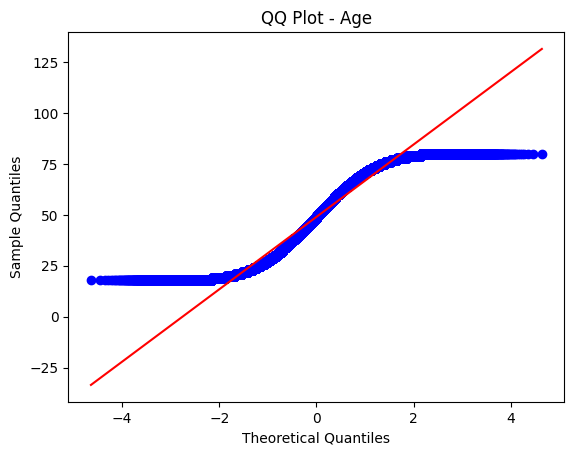

In [ ]:
import scipy.stats as stats

# Extract the 'age' column from the DataFrame
age_column = data['Age']

# Generate the QQ plot
stats.probplot(age_column, dist="norm", plot=plt)
plt.title("QQ Plot - Age")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# FEEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Age', 'rating', 'usefulCount']
scaler = MinMaxScaler()

# Perform min-max scaling on the specified columns
data_new[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


In [ ]:
data_new.head()

,Age,rating,usefulCount,Side effects,Race_Asian,Race_Hispanic,Race_Mixed,Race_White,Gender_Male,drugName,condition
0,1.000000,1.000000,0.017041,1,0,1,0,0,1,1.956012,1.995100
1,0.725806,0.777778,0.013168,3,0,0,0,0,1,2.004587,2.118609
2,1.000000,0.888889,0.002324,3,1,0,0,0,0,1.997658,1.971095
3,0.032258,0.888889,0.027111,4,0,1,0,0,1,1.958621,1.986282
4,0.451613,0.888889,0.003098,1,0,1,0,0,0,2.173926,1.998775


In [ ]:
##SPLITTING THE DATASET INTO TEST AND TRAIN DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [ ]:
##BALANCING THE DATASET USING SMOTE METHOD
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=0)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter

In [ ]:
print('original dataset shape {}'.format(sorted(Counter(y_train).items())))
print('Resampled dataset shape {}'.format(sorted(Counter(y_train_sm).items())))


original dataset shape [(0, 45753), (1, 53638), (2, 58747), (3, 75131), (4, 34609)]
Resampled dataset shape [(0, 71893), (1, 65522), (2, 67900), (3, 64643), (4, 65945)]


<Axes: xlabel='Side effects', ylabel='count'>

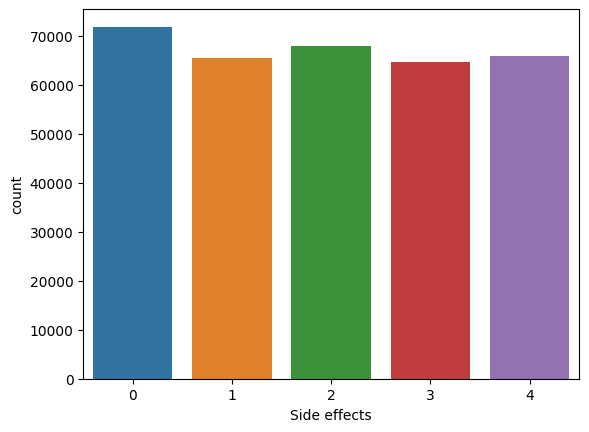

In [ ]:
sns.countplot(x =y_train_sm)

In [ ]:
# import necessary libraries and fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:

models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier()}

for name,model in models.items():
    model.fit(x_train_sm,y_train_sm)
    print(name+'  trained')

RandomForestClassifier  trained


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression  trained
KNeighborsClassifier  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained


In [ ]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred,average = 'macro'))
    model_test_f1_score.append(f1_score(y_test,y_pred,average = 'macro'))
    model_test_precision_score.append(precision_score(y_test,y_pred,average = 'macro'))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix3={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'DecisionTree':model_conf_mat[3],
                  'BernolliNB':model_conf_mat[4],
                  'GaussianNB':model_conf_mat[5],
                  'XGBClassifier':model_conf_mat[6],
                 }
confusion_matrix3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Random Forest': array([[22318,    41,     0,     0,     0],
        [ 3926, 19383,     0,     0,  3218],
        [    0,     0, 28962,   151,     0],
        [    0,     5,  7948, 24182,  4616],
        [    0,  9045,     0,  3237,  4909]]),
 'Logistic regression': array([[22352,     7,     0,     0,     0],
        [ 3933, 20248,     0,     0,  2346],
        [    0,     0, 29113,     0,     0],
        [    0,     0,  7996, 22250,  6505],
        [    0,  9400,     0,  2004,  5787]]),
 'KNN': array([[21108,   745,   114,   269,   123],
        [ 3884, 14798,   135,   357,  7353],
        [  210,   208, 26714,  1849,   132],
        [ 2187,  1998,  9035, 17943,  5588],
        [  195,  7002,   131,  3269,  6594]]),
 'DecisionTree': array([[19702,  2657,     0,     0,     0],
        [ 3466, 15687,     0,     0,  7374],
        [    0,     0, 24383,  4730,     0],
        [    0,   337,  6690, 24924,  4800],
        [    0,  7168,     0,  3668,  6355]]),
 'BernolliNB': array([[22359,

In [ ]:
Models = ['Random Forest','Logistic regression','KNN','DecisionTree','BernolliNB','GaussianNB','XGBClassifier']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.756906,0.717734,0.734940,0.717498
1,Logistic regression,0.756020,0.722427,0.741008,0.726080
2,KNN,0.660576,0.638351,0.658259,0.638642
3,DecisionTree,0.690051,0.668560,0.671699,0.666794
4,BernolliNB,0.779280,0.670520,0.726818,0.625830
5,GaussianNB,0.773429,0.691097,0.730258,0.706506
6,XGBClassifier,0.765774,0.715198,0.737699,0.719196


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Hyperparameter tuning with RandomizedSearch and GridSearch

from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Initialize logistic regression model
logistic_model = LogisticRegression()

# Define hyperparameters to tune and their respective search spaces
param_dist = {
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': np.arange(100, 1000, 100)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logistic_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Perform the RandomizedSearchCV on your data
random_search.fit(x, y)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'max_iter': 100}
Best Accuracy: 0.7798979034581544


In [ ]:
best_params = random_search.best_params_

In [ ]:
best_params

{'solver': 'newton-cg',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'max_iter': 100}

In [ ]:
param_grid = {
    'solver': ['newton-cg'],
    'penalty': ['l2'],
    'multi_class': ['multinomial'],
    'max_iter': [100]
}


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Step 2: Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_model,
    param_grid=param_grid,scoring = 'accuracy',
    cv=5)


# Step 3: Fit the GridSearchCV object on your training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100], 'multi_class': ['multinomial'],
                         'penalty': ['l2'], 'solver': ['newton-cg']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_logistic_model = grid_search.best_estimator_

In [ ]:
y_pred = best_logistic_model.predict(x_test)

#print("Best Parameters:", best_params)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average = 'macro'))
print('Recall = ',recall_score(y_test,y_pred,average = 'macro'))
print('F1 Score = ',f1_score(y_test,y_pred,average = 'macro'))

Accuracy =  0.7793710825293123
Precision =  0.7330570254346507
Recall =  0.7273309648135385
F1 Score =  0.6725520726141059


In [ ]:
grid_search.best_params_

{'max_iter': 100,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [ ]:
logistic_model_best = LogisticRegression(max_iter=100, multi_class='multinomial', penalty='l2', solver='newton-cg')
logistic_model_best.fit(x_train, y_train)


LogisticRegression(multi_class='multinomial', solver='newton-cg')